In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import util as u

# validating easy/hard pos/neg mining

## embedding distances across time

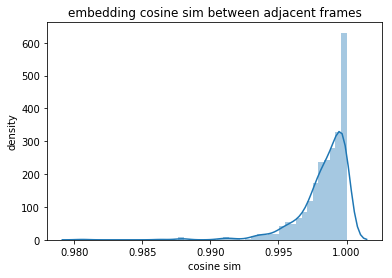

In [48]:
m = list(u.slurp_manifest("imgs/02_20c_10o.c00_r00.manifest"))
e = np.load('runs/04/c00_r00.embeddings.npy')

adjacent_distances = []
for i in range(len(e)-1):
    adjacent_distances.append(np.dot(e[i], e[i+1].T))
    #adjacent_distances.append(np.linalg.norm(e[i]-e[i+1]))
ax = sns.distplot(adjacent_distances)
ax.set_title('embedding cosine sim between adjacent frames')
ax.set_xlabel('cosine sim')
ax.set_ylabel('density')
ax.figure.savefig("blog_imgs/embed_sim_over_time.adjacent.png")


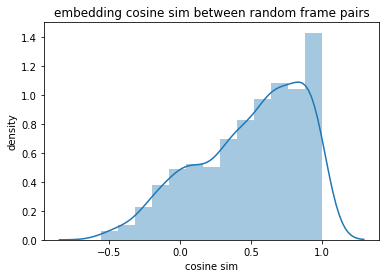

In [49]:
random_pair_distances = []
for _ in range(len(adjacent_distances)):
    i, j = np.random.randint(0, len(adjacent_distances), (2,))
    random_pair_distances.append(np.dot(e[i],e[j].T))
ax = sns.distplot(random_pair_distances)
ax.set_title('embedding cosine sim between random frame pairs')
ax.set_xlabel('cosine sim')
ax.set_ylabel('density')
ax.figure.savefig("blog_imgs/embed_sim_over_time.random.png")

## embedding distances across camera positions

[[0.         1.        ]
 [0.22663925 0.61762172]
 [0.229265   0.43056725]
 [0.09020938 0.57658447]
 [0.24589699 0.87990917]
 [0.0748731  0.93798025]
 [0.09853535 0.88254632]
 [0.21734194 0.94715587]
 [0.10339291 0.97894545]
 [0.29975755 0.92847804]
 [0.19927535 0.8608534 ]
 [0.23734374 0.89687916]
 [0.30803661 0.81287148]
 [0.19244141 0.89216476]
 [0.19302876 0.86395085]
 [0.24308667 0.89306071]
 [0.24812496 0.92615039]
 [0.22267963 0.88808737]
 [0.2301282  0.60250511]
 [0.2516093  0.43425972]
 [0.19844373 0.96063937]
 [0.24141683 0.67136712]
 [0.27066861 0.98887386]
 [0.18747663 0.83668402]
 [0.26045212 0.70860156]
 [0.23143438 0.97306925]
 [0.19373693 0.89800279]
 [0.10583512 0.89754435]
 [0.24119231 0.71020634]
 [0.17489792 0.96113032]
 [0.17733958 0.94469123]
 [0.22083483 0.97282726]
 [0.29441584 0.68681136]
 [0.21668726 0.78990549]
 [0.19841277 0.95045799]
 [0.21765982 0.48015881]
 [0.15205242 0.29991713]
 [0.18308597 0.61287436]
 [0.22920841 0.95614609]
 [0.14069503 0.92177285]


Text(33.0, 0.5, 'camera perturbation')

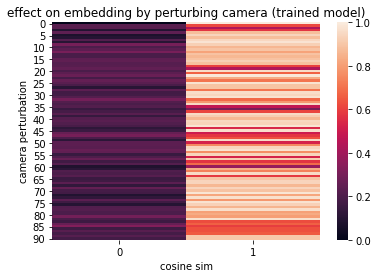

In [17]:
m = list(u.slurp_manifest("imgs/perturbed.manifest"))
e = np.load('perturbed.embeddings.trained.npy')

camera_distances = [0]
sims = [1]
for line in open("perturbed_cameras.ssv", "r").readlines():
    cols = line.strip().split(" ")
    assert len(cols) == 5
    i, cs = int(cols[0]), float(cols[4])
    camera_distances.append(cs)
    sims.append(np.dot(e[0], e[i].T))

data = np.stack([camera_distances, sims])
print(data.T)
ax = sns.heatmap(data.T)
ax.set_title('effect on embedding by perturbing camera (trained model)')
ax.set_xlabel('cosine sim')
ax.set_ylabel('camera perturbation')
#ax.figure.savefig("blog_imgs/embed_sims_over_camera_perturbation.trained.png")

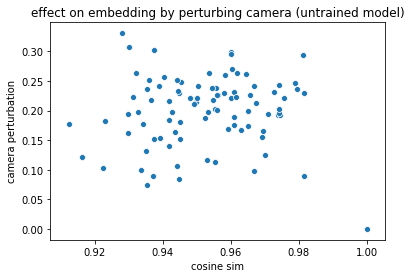

In [11]:
m = list(u.slurp_manifest("imgs/perturbed.manifest"))
e = np.load('perturbed.embeddings.untrained.npy')


camera_distances = [0]
sims = [1]
for line in open("perturbed_cameras.ssv", "r").readlines():
    cols = line.strip().split(" ")
    assert len(cols) == 5
    i, cs = int(cols[0]), float(cols[4])
    camera_distances.append(cs)
    sims.append(np.dot(e[0], e[i].T))

ax = sns.scatterplot(sims, camera_distances)
ax.set_title('effect on embedding by perturbing camera (untrained model)')
ax.set_xlabel('cosine sim')
ax.set_ylabel('camera perturbation')
ax.figure.savefig("blog_imgs/embed_sims_over_camera_perturbation.untrained.png")

# completely random hacking

In [14]:
e_w = np.load('e_works.npy')
e_t = np.load('e_test.npy')
assert e_w.shape == e_t.shape

In [17]:
np.all(np.isclose(e_w, e_t))

True

In [16]:
e_t[:5,:5]

array([[-0.08808494, -0.17831662,  0.04001825, -0.16757978, -0.07767199],
       [-0.09215284, -0.11333137,  0.0547974 , -0.14754866, -0.0752871 ],
       [-0.09482307, -0.14327487,  0.0655962 , -0.14350082, -0.1052524 ],
       [ 0.01199612,  0.09223365,  0.07091589, -0.21326718,  0.0829879 ],
       [-0.045909  , -0.05932617, -0.01245034, -0.10496496,  0.1141019 ]])

In [13]:
e2 = np.load('runs/04/c00_r00.embeddings.npy')
e2[:5,:5]

array([[-0.07983745, -0.17114471,  0.03483009, -0.17119506, -0.07918186],
       [-0.07981792, -0.12741959,  0.06311075, -0.13582785, -0.07906447],
       [-0.0886931 , -0.16535766,  0.06821921, -0.12933059, -0.12193801],
       [ 0.02222739,  0.09885567,  0.06733511, -0.21459953,  0.07732542],
       [-0.04042625, -0.0620246 , -0.00249835, -0.10993989,  0.09479527]])

In [11]:
np.all(np.isclose(e, e2))

False

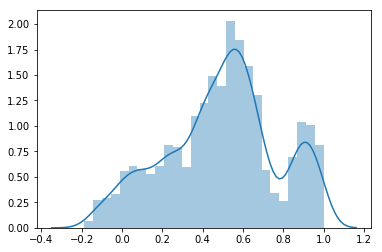

In [7]:
sns.distplot(sims.flatten())

In [19]:
e1 = np.load('runs/02/c00_r00.embeddings.npy')
e2 = np.load('runs/02/c01.embeddings.npy')
e1.shape, e2.shape

((709, 32), (71117, 32))

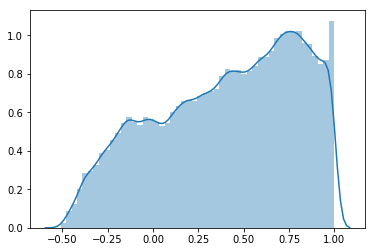

In [18]:
sns.distplot(np.dot(e1, e1.T).flatten())

In [9]:
sims = np.dot(e1[:5], e2.T)
sims.reshape((-1)).shape

(355585,)

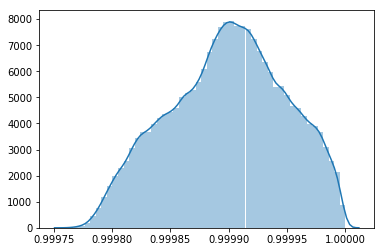

In [10]:
sns.distplot(sims.flatten())

In [14]:
e1[:5,:5]

array([[-0.1284602 , -0.12794438,  0.22959302,  0.08575856,  0.28901944],
       [-0.12822026, -0.12718618,  0.22903325,  0.08627119,  0.2891878 ],
       [-0.12824811, -0.12684532,  0.22904095,  0.0867584 ,  0.28911984],
       [-0.12846395, -0.12723678,  0.22935605,  0.08905552,  0.28935036],
       [-0.12860335, -0.12802534,  0.22965437,  0.08508592,  0.2892109 ]],
      dtype=float32)

In [15]:
e2[:5,:5]

array([[-0.12863946, -0.1275136 ,  0.22943132,  0.08806123,  0.28904328],
       [-0.12849262, -0.12591124,  0.22942804,  0.08532426,  0.28882858],
       [-0.12835164, -0.12735394,  0.22937302,  0.08607543,  0.28903446],
       [-0.12836447, -0.12671411,  0.22959775,  0.0871993 ,  0.28831062],
       [-0.12874003, -0.1263758 ,  0.2295879 ,  0.08612403,  0.2897973 ]],
      dtype=float32)

In [11]:
e = np.load('test.embeddings.npy')

In [12]:
e[:5,:5]

array([[ 0.0532015 ,  0.06980602,  0.09023556,  0.11658901,  0.17427713],
       [ 0.2683448 , -0.21022265, -0.0240408 , -0.37470838,  0.17664894],
       [ 0.16240068, -0.07762323,  0.10299526, -0.04981999,  0.02589102],
       [ 0.376801  , -0.21075071, -0.03314418, -0.24946973, -0.07602685],
       [ 0.13924132, -0.02110955,  0.12729912, -0.00872147,  0.2222317 ]],
      dtype=float32)

In [13]:
sims = np.dot(e, e.T).flatten()

In [14]:
np.min(sims), np.max(sims)

(-0.5046115, 1.0000002)

In [20]:
import util as u

In [65]:
manifest_a = list(u.slurp_manifest('runs/01/c00_r00.manifest'))
manifest_b = list(u.slurp_manifest('runs/01/c01.manifest'))

In [57]:
e_a = np.load("runs/02/c00_r00.embeddings.npy")
e_b = np.load("runs/02/c01.embeddings.npy")
print(e1.shape, e2.shape)

(709, 32) (71117, 32)


In [49]:
print(manifest1.index('runs/01/imgs/c00/r00/f666.png'),
      manifest2.index('runs/01/imgs/c01/r00/f670.png'))

609 47931


In [58]:
idxs_a = range(709)
sims = np.dot(e_a[idxs_a], e_b.T)
print(sims.shape)
print(sims[:3,:3])

(709, 71117)
[[0.7314123  0.4887887  0.6909301 ]
 [0.9063827  0.301327   0.44298926]
 [0.90144175 0.08524446 0.35549554]]


In [60]:
top_N = np.argmax(sims, axis=1)
top_N[:5]

array([ 1252, 18517, 49432, 31061, 13153])

In [66]:
for e_a_idx, closest_e_b_idx in	enumerate(top_N):
    print("e_a_idx", e_a_idx, "closest_e_b_idx", closest_e_b_idx)
    print(np.dot(e_a[e_a_idx], e_b[closest_e_b_idx].T))
    print(manifest_a[e_a_idx], manifest_b[closest_e_b_idx])
    if e_a_idx > 10: break

e_a_idx 0 closest_e_b_idx 1252
0.9951277
runs/01/imgs/c00/r00/f275.png runs/01/imgs/c01/r22/f675.png
e_a_idx 1 closest_e_b_idx 18517
0.99527353
runs/01/imgs/c00/r00/f072.png runs/01/imgs/c01/r48/f405.png
e_a_idx 2 closest_e_b_idx 49432
0.99590087
runs/01/imgs/c00/r00/f043.png runs/01/imgs/c01/r14/f414.png
e_a_idx 3 closest_e_b_idx 31061
0.9884887
runs/01/imgs/c00/r00/f608.png runs/01/imgs/c01/r97/f527.png
e_a_idx 4 closest_e_b_idx 13153
0.99803036
runs/01/imgs/c00/r00/f167.png runs/01/imgs/c01/r08/f559.png
e_a_idx 5 closest_e_b_idx 41302
0.9945401
runs/01/imgs/c00/r00/f546.png runs/01/imgs/c01/r68/f609.png
e_a_idx 6 closest_e_b_idx 19752
0.9984691
runs/01/imgs/c00/r00/f432.png runs/01/imgs/c01/r78/f517.png
e_a_idx 7 closest_e_b_idx 31948
0.9978769
runs/01/imgs/c00/r00/f034.png runs/01/imgs/c01/r49/f123.png
e_a_idx 8 closest_e_b_idx 6938
0.9891172
runs/01/imgs/c00/r00/f411.png runs/01/imgs/c01/r10/f548.png
e_a_idx 9 closest_e_b_idx 14739
0.99549335
runs/01/imgs/c00/r00/f129.png runs/01/

In [44]:
np.argsort(sims).shape[closest_e_b_idx]

(5, 709)

In [38]:
top_5 = np.argsort(sims.T)[:,-5:]
top_5.shape

(709, 5)

In [41]:
top_5[3]

array([0, 1, 3, 2, 4])